In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
train_data = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

train = train_data.flow_from_directory(directory="gdrive/My Drive/CK+48/train/",
                                       target_size=(224,224),
                                       batch_size=32)

Found 733 images belonging to 7 classes.


In [17]:
test_data = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)
test = train_data.flow_from_directory(directory="gdrive/My Drive/CK+48/test/",
                                       target_size=(224,224),
                                       batch_size=32)

Found 248 images belonging to 7 classes.


In [23]:

base = MobileNet(input_shape=(224,224,3),include_top=False)
for layer in base.layers:
  layer.trainable=False

x=Flatten()(base.output)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
x=Dense(units=7,activation='softmax')(x)
model=Model(base.input,x)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [24]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [26]:
history = model.fit_generator(generator=train,steps_per_epoch=18, epochs=5, validation_data=test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
18/18 [==============================] - 57s 3s/step - loss: 0.0786 - accuracy: 0.9686 - val_loss: 0.1885 - val_accuracy: 0.9395
Epoch 2/5
18/18 [==============================] - 59s 3s/step - loss: 0.0475 - accuracy: 0.9895 - val_loss: 0.1289 - val_accuracy: 0.9395
Epoch 3/5
18/18 [==============================] - 51s 3s/step - loss: 0.0495 - accuracy: 0.9896 - val_loss: 0.0480 - val_accuracy: 0.9798
Epoch 4/5
18/18 [==============================] - 51s 3s/step - loss: 0.0255 - accuracy: 0.9965 - val_loss: 0.1218 - val_accuracy: 0.9637
Epoch 5/5
18/18 [==============================] - 52s 3s/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0647 - val_accuracy: 0.9839


In [27]:
model.save('emotion_detection.h5')

In [33]:
from google.colab import files
files.download("emotion_detection.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
dict = {0 : 'anger', 1:'contempt', 2:'disgust',3:'fear',4:'happy',5:'sad',6:'surprise'}

Emotion Detected is anger


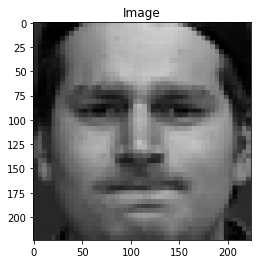

In [30]:
from keras.preprocessing import image

img = image.load_img("gdrive/My Drive/CK+48/test/anger/S134_003_00000010.png" , target_size = (224, 224))
i = image.img_to_array(img)/255
ia = np.array([i])
ia.shape

pred = np.argmax(model.predict(ia))
print(f"Emotion Detected is {dict[pred]}")
plt.imshow(ia[0])
plt.title("Image")
plt.show()

Emotion Detected is happy


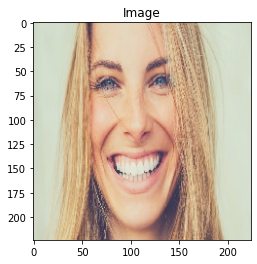

In [32]:

img = image.load_img("gdrive/My Drive/Colab Notebooks/happy.jpg" , target_size = (224, 224))
i = image.img_to_array(img)/255
ia = np.array([i])
ia.shape

pred = np.argmax(model.predict(ia))
print(f"Emotion Detected is {dict[pred]}")
plt.imshow(ia[0])
plt.title("Image")
plt.show()